Single spillover branching process with single mutation toggle. Plots probabilities of outbreak.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
###################################################
# simulates infection WITHOUT recurrent spillover 
# allows R0 to mutate between two possible values.          
#
# also note that if the infection goes extinct the time of extinction is well-defined, and either implementation computes it correctly.
###################################################
#
# input R_0 is transmission rate of the initial/standard variant.
# input R_1 is the transmission rate of the mutated variant.
#
# input mu represents mutation rate.
#
###################################################
#
# returns 0 if extinction
# returns 1 if outbreak
#
###################################################

def sim(R_0, R_1, mu):
    
    outbreak_thresh = 100 #call it an outbreak if this many people are infected
    
    t = 0
    
    #store number of cases with R_0, number of cases with R_1
    I_0 = 1
    I_1 = 0
    
    while True: 
            
        #branch by one generation.
        
##################################################################################
######### Assuming the number of secondary infections is Poisson distributed without backwards mutation #####

#         I_1 = np.random.poisson(I_0*mu*R_0) + np.random.poisson(I_1*R_1)
#         I_0 = np.random.poisson(I_0*(1 - mu)*R_0)

##################################################################################

##################################################################################
######### Assuming the number of secondary infections is Poisson distributed with backwards mutation #####

#         I_1 = np.random.poisson(I_0*mu*R_0) + np.random.poisson(I_1*(1-mu)*R_1)
#         I_0 = np.random.poisson(I_0*(1 - mu)*R_0) + np.random.poisson(I_I*mu*R_1)

##################################################################################

# #########################################################################################
# ######### Assuming the total number of secondary infections negative-binomially distributed without backwards mutation #####
# ######### (i.e. geometrically distributed for each individual)

#         if I_0 >0:
#             #number of new infections generated by people of type 0
#             n0 = np.random.negative_binomial(I_0, 1/(R_0 + 1)) #draw the number of failures that happen before I_0 successes occur, where the probability of success (i.e. recovery) is 1/(R_0+1)
        
#             #figure out how many of those are type 0 and type 1
#             rand = np.random.choice(2, n0, p=[1-mu, mu]) #randomly draw an array of 0s and 1s, where each draw has 1-mu probability of being a 0, and mu probability of being a 1.
#             s = rand.sum() #count up total number of 1s drawn (corresponds to number of type 1 infections)
#             n00 = n0-s #number that are type 0
#             n01 = s #number that are type 1   
            
#         else: n00 = 0; n01 = 0
    
#         if I_1 > 0 :
#             #number of new infections generated by people of type 1 (all are type 1)
#             n1 = np.random.negative_binomial(I_1, 1/(R_1 + 1))
            
#         else: n1 = 0

#         #update totals
#         I_0 = n00
#         I_1 = n01 + n1

# #########################################################################################

#########################################################################################
######### Assuming the total number of secondary infections negative-binomially distributed with backwards mutation #####
######### (i.e. geometrically distributed for each individual)

        if I_0 > 0:
            #number of new infections generated by people of type 0
            n0 = np.random.negative_binomial(I_0, 1/(R_0 + 1)) #draw the number of failures that happen before I_0 successes occur, where the probability of success (i.e. recovery) is 1/(R_0+1)
        
            #figure out how many of those are type 0 and type 1
            rand = np.random.choice(2, n0, p=[1-mu, mu]) #randomly draw an array of 0s and 1s, where each draw has 1-mu probability of being a 0, and mu probability of being a 1.
            s = rand.sum() #count up total number of 1s drawn (corresponds to number of type 1 infections)
            n00 = n0-s #number that are type 0
            n01 = s #number that are type 1   
            
        else: n00 = 0; n01 = 0
    
        if I_1 > 0 :
            
            #number of new infections generated by people of type 1
            n1 = np.random.negative_binomial(I_1, 1/(R_1 + 1)) #draw the number of failures that happen before I_1 successes occur, where the probability of success (i.e. recovery) is 1/(R_1+1)
        
            #figure out how many of those are type 0 and type 1
            rand = np.random.choice(2, n1, p=[mu, 1-mu]) #randomly draw an array of 0s and 1s, where each draw has mu probability of being a 0, and 1-mu probability of being a 1.
            s = rand.sum() #count up total number of 1s drawn (corresponds to number of type 1 infections)
            n10 = n1-s #number that are type 0
            n11 = s #number that are type 1 
            
        else: n10 = 0; n11 = 0

        #update totals
        I_0 = n00 + n10
        I_1 = n01 + n11

#########################################################################################

        #check if we reached the outbreak threshold
        if I_0 + I_1 > outbreak_thresh:
            return 1
        
        #check if we reached extinction
        if I_0 + I_1 == 0:
            return 0

In [3]:
#########################
# runs many simulations #
#########################
#
# optional input N_sims is number of simulations to run.
#
# returns the percentage of those simulations that outbreak
#
#########################

def sim_percentage(R_0, R_1, mu, N_sims=1000):   
    N_outbreaks = 0  
    for i in range(N_sims):
        if sim(R_0, R_1, mu) == 1: N_outbreaks += 1
    return N_outbreaks/N_sims

In [4]:
# run a single simulation

#parameters
R_0 = 1.5
R_1 = 0
mu = 0

sim(R_0, R_1, mu)

1

In [5]:
# run a bulk simulation

#parameters

R_0 = 1.5
R_1 = 0
mu = 0

sim_percentage(R_0, R_1, mu, N_sims=10)

0.3

In [6]:
#################################################################
# for a fixed mu and R_1, plots the probability of outbreak against R_0 #
#################################################################
#
# inputs mu, R_1
#
# optional inputs R0_min, R0_max give range of R_0 to plot over.
# optional input N_points gives number of points to plot.
# optional inputs N_sims gives number of simulations to run per point.
#
################################################################

def prob_plot(mu, R_1, R0_min=0.001, R0_max=2.5, N_points = 75, N_sims=750):

    # initialize arrays to be plotted
    R0 = []; percent = []
    
    # Take some evenly spaced R_0 values
    R0 = np.linspace(R0_min, R0_max, N_points)

    #simulate percentages of outbreak
    for r_0 in R0:
        percent = np.append(percent, sim_percentage(r_0, R_1, mu, N_sims))
        
    #make the plot
    plt.plot(R0, percent, "ob")
    #graph the actual probability of outbreak with no mutation
    #################################################################
    # From Linda's talk: the actual probability of outbreak with no mutation is:
    #                            0 if R_0 < 1
    #                            1-1/R_0 if R_0 > 1
    #################################################################
    plt.plot(R0, np.piecewise(R0, [R0<1, R0>=1], [0, lambda R0: 1-1/R0]), "r", label='probability without mutation')
    plt.title('mu = {}'.format(mu))
    plt.xlabel("R_0"); plt.ylabel("p")
    plt.xlim(R0_min, R0_max)
    plt.legend()
    plt.show()

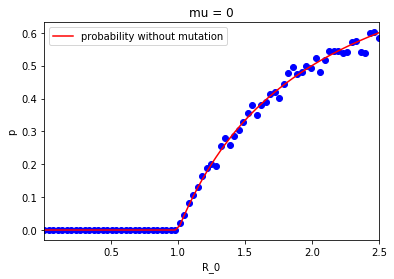

CPU times: user 9.45 s, sys: 90.2 ms, total: 9.54 s
Wall time: 10.3 s


In [7]:
%%time

# SANITY CHECK
# When there is no mutation, check that our simulation agrees with the correct probability
# (it doesn't matter what R_1 is here)

prob_plot(mu=0, R_1 = 0)

Simulate some other values of mu. Note the scale changes on the axes

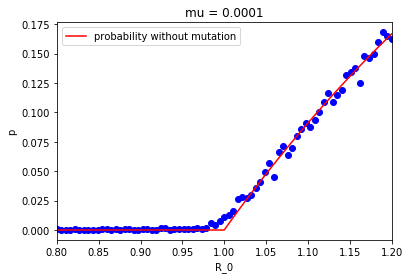

CPU times: user 27.9 s, sys: 56.1 ms, total: 27.9 s
Wall time: 28.1 s


In [8]:
%%time

#zoom in
prob_plot(mu=0.0001, R_1 = 1.5, R0_min=0.8, R0_max=1.2, N_points = 75, N_sims=2000)

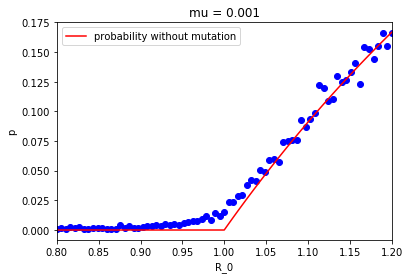

CPU times: user 30.1 s, sys: 96.3 ms, total: 30.2 s
Wall time: 30.5 s


In [9]:
%%time

prob_plot(mu=0.001, R_1 = 1.5, R0_min=0.8, R0_max=1.2, N_points = 75, N_sims=2000)

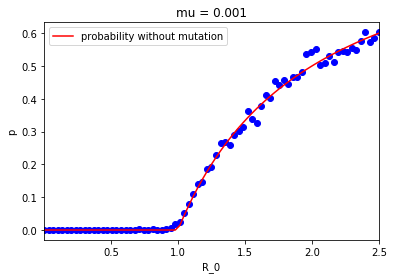

CPU times: user 9.75 s, sys: 49.4 ms, total: 9.8 s
Wall time: 10 s


In [10]:
%%time

#zoom back out
prob_plot(mu=0.001, R_1 = 1.5)

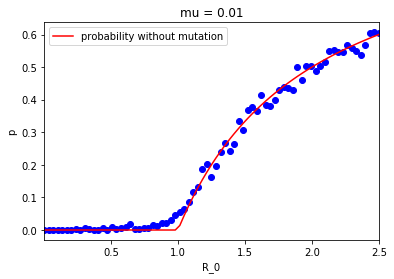

CPU times: user 11.1 s, sys: 67 ms, total: 11.1 s
Wall time: 11.3 s


In [11]:
%%time

prob_plot(mu=0.01, R_1 = 1.5)

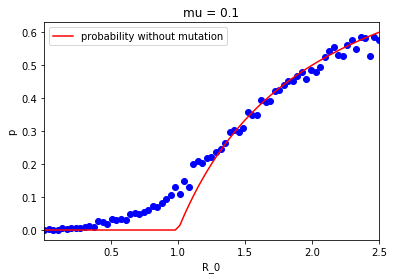

CPU times: user 13.1 s, sys: 38.2 ms, total: 13.1 s
Wall time: 13.2 s


In [12]:
%%time

prob_plot(mu=0.1, R_1 = 1.5)

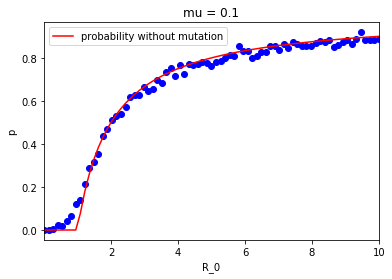

CPU times: user 12.4 s, sys: 36.3 ms, total: 12.4 s
Wall time: 12.7 s


In [13]:
%%time

#zoom out more
prob_plot(mu=0.1, R_1 = 1.5, R0_max=10)

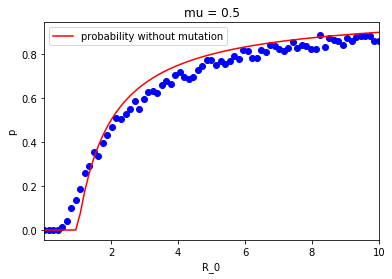

CPU times: user 17.3 s, sys: 118 ms, total: 17.5 s
Wall time: 18.1 s


In [14]:
%%time

prob_plot(mu=0.5, R_1 = 1.5, R0_max=10)

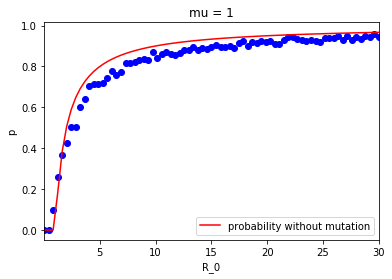

CPU times: user 9.73 s, sys: 28.2 ms, total: 9.76 s
Wall time: 9.83 s


In [15]:
%%time

prob_plot(mu=1, R_1 = 1.5, R0_max=30)

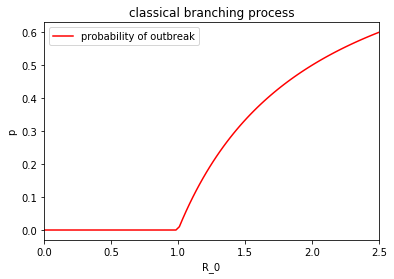

In [16]:
# initialize arrays to be plotted
R0 = np.linspace(0, 2.5, 100)

plt.plot(R0, np.piecewise(R0, [R0<1, R0>=1], [0, lambda R0: 1-1/R0]), "r", label='probability of outbreak')
plt.title('classical branching process')
plt.xlabel("R_0"); plt.ylabel("p")
plt.xlim(0, 2.5)
plt.legend()
plt.show()